----------------------

# <center>Анализ данных сервиса аренды самокатов GoFast</center>


В представленном проекте будет проводиться анализ популярного сервиса аренды самокатов GoFast. Имея данные о некоторых пользователях из нескольких городов, а также об их поездках, будет проводится анализ данных и проверка гипотез, которые могут помочь бизнесу вырасти. 

Чтобы проверка гипотез была четкой и достоверной - проведем предобработку данных, проверим полноту таблиц, сделаем раздел с  исследовательским аналиом данных, создадим новые таблицы по пользователям в зависимости от наличия подписки, выведем прибыль, полученную по месяцам, а затем непосредственно перейдем к проверке гипотез.



In [1]:
import matplotlib.pyplot as plt  #подключаем необходимые для работы библиотеки
import pandas as pd
import numpy as np
from scipy import stats as st

#### Шаг 1. Загрузка данных

In [2]:
users = pd.read_csv('/datasets/users_go.csv') #выгружаем таблицы
riders = pd.read_csv('/datasets/rides_go.csv')
subs = pd.read_csv('/datasets/subscriptions_go.csv')
print('Таблица "users" с общей информацией о пользователях:')
display(users) #выводим первые строки каждого датафрейма
print()
print('Таблица "riders" с информацией о  поездках:')
display(riders)
print()
print('Таблица "subs" с информацией о подписках:')
display(subs)


Таблица "users" с общей информацией о пользователях:


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
...,...,...,...,...,...
1560,829,Федор,29,Пятигорск,free
1561,809,Юрий,26,Сочи,free
1562,307,Ясмина,19,Краснодар,ultra
1563,47,Юрий,28,Тюмень,ultra



Таблица "riders" с информацией о  поездках:


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04
18064,1534,2840.423057,21.409799,2021-11-16
18065,1534,3826.185507,18.435051,2021-11-18
18066,1534,2902.308661,16.674362,2021-11-27



Таблица "subs" с информацией о подписках:


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [3]:
print(users.info()) #получаем общую информацию о каждой таблице 
print()
print(riders.info())
print()
print(subs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 column

На первом этапе выгруженны таблицы с присвоенными им переменными, выведены первые строки датафрейма на экран для наглядности, а также с помощью метода info() получена общая информация о таблицах - таблицы имеют название столбцов в едином регистре, соответствующие типы данных, а также отсуствуют "NaN" значения.

#### Шаг 2. Предобработка данных

In [4]:
riders['date'] = pd.to_datetime(
    riders['date'], format='%Y-%m-%dT%H:%M:%S') #приводим столбец с датой в формат datetime
riders['month'] = riders['date'].dt.month #создаем новый столбец с месяцем 
print(np.sort(riders['month'].unique())) #проверяем наличие всех месяцев

[ 1  2  3  4  5  6  7  8  9 10 11 12]


Проверяем, приходятся ли все записи на 1 год:

In [5]:
riders['year'] = riders['date'].dt.year #создаем новый столбец с годом
print(riders['year'].unique()) 

[2021]


In [6]:
print('Количество пропусков:', users.isna().sum()) #проверяем наличие пропусков и дубликавов 
print('Количество дубликатов:', users.duplicated().sum())

Количество пропусков: user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64
Количество дубликатов: 31


In [7]:
print('Количество пропусков:',riders.isna().sum())
print('Количество дубликатов:', riders.duplicated().sum()) 

Количество пропусков: user_id     0
distance    0
duration    0
date        0
month       0
year        0
dtype: int64
Количество дубликатов: 0


In [8]:
print('Количество пропусков:', subs.isna().sum())
print('Количество дубликатов:', subs.duplicated().sum()) 

Количество пропусков: subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64
Количество дубликатов: 0


In [9]:
#удаляем обнаруженные дубликаты
users = users.drop_duplicates().reset_index(drop=True) 
print('Количество дубликтов после удаления:', users.duplicated().sum())

Количество дубликтов после удаления: 0


На этапе предобработки данных проведен анализ пропусков и повторяющихся значений. Пропусков во всех трех таблицах обнаружено не было. Дубликаты найдены только в таблице "users". Найденные дубликаты удалены, индексы датафейма обновлены. 

#### Шаг 3. Исследовательский анализ данных

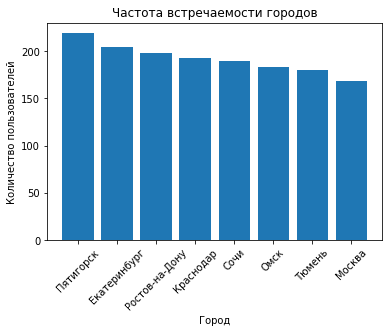

In [10]:
city_count = users['city'].value_counts()
plt.bar(city_count.index, city_count.values)
plt.title('Частота встречаемости городов');
plt.xticks(rotation=45) 
plt.ylabel('Количество пользователей');
plt.xlabel('Город');

Лидер по использовунию самокатов данного поставщика услуг аренды - Пятигорск. Наименьшее количество представлено в Москве. Очевидно, поскольку в Москве огромная конкуренция. Краснодар, Омс, Тюмень также являются городами-миллионниками по количеству населения, что позволяет также предположить уменьшение их встречаемости из-за наличия конкуренции. Сочи, хоть и не город-миллионник, однако, из-за туристической популярности в городе также могут присуствовать множество самокатов различных фирм. 

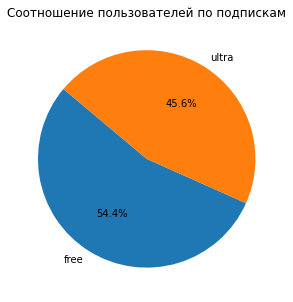

In [11]:
subs_count = users['subscription_type'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(subs_count, labels=subs_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Соотношение пользователей по подпискам');

Большинство людей, использующих самокаты, предпочитаю бесплатный тариф, в то время, как подписку покуют примерно на 150 пользователей меньше. 

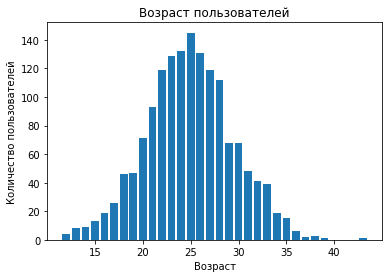

In [12]:
age_count = users['age'].value_counts()
plt.bar(age_count.index, age_count.values)
plt.title('Возраст пользователей');
plt.ylabel('Количество пользователей');
plt.xlabel('Возраст');

In [13]:
users['age'].describe() #выводим описательную статистику для распределения возрастов пользователец

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Превалирующее количество пользователей находятся в рамке 22-28 лет с пиком в 25 лет - люди, ведущий активный образ жизни, открытые к новым технологиям и положительно относящиеся к самокатам как к типу транспорта. Применение метода describe() полносью отразило распределение на графикек - средний возраст пользователей определяется как 24.9 года. а медианное значение сводится к 25 годам. Самому младшему пользователю самокатов - 12 лет, а старше 43 никто уже не пользуется самокатами. 

Таким образом, полученное распределение на практике можно использовать как ЦА для проведение каких-либо рекламных акций, либо же опросов. 

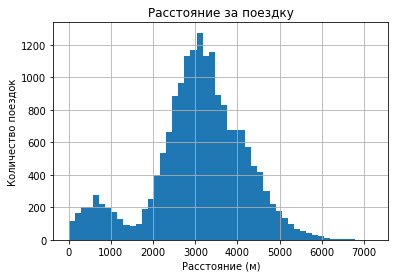

In [14]:
riders['distance'].hist(bins=50)
plt.title('Расстояние за поездку');
plt.ylabel('Количество поездок');
plt.xlabel('Расстояние (м)');

Во избежании визуальной перегрузки данными, для информации о расстоянии поездки строим гистограмму со всеми поездками всех пользователей. Такой подход позволит оценить наиболее релевантное расстояние поездки - видно, что больше всего поездок совершается на расстояние около 3 км. Появление пика на расстоянии около 800 м может быть обусловлен тем, что многие пользователи первую (тестовую) поездку предпочитают делать на короткие расстояния.

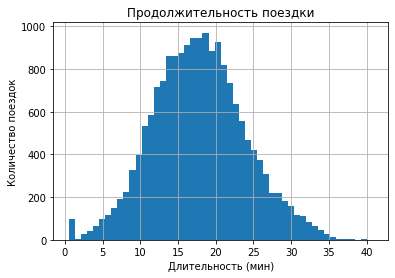

In [15]:
riders['duration'].hist(bins=50)
plt.title('Продолжительность поездки');
plt.ylabel('Количество поездок');
plt.xlabel('Длительность (мин)');

In [16]:
riders.query('duration < 1') #выводим значения, где продолжительность поездки менее 1 мин

,user_id,distance,duration,date,month,year
6531,701,4196.445201,0.5,2021-08-31,8,2021
6570,704,4830.824371,0.5,2021-10-14,10,2021
6680,712,4684.004397,0.5,2021-03-04,3,2021
6695,713,5215.642710,0.5,2021-02-25,2,2021
6768,718,5197.436649,0.5,2021-02-11,2,2021
...,...,...,...,...,...,...
17004,1460,5531.335845,0.5,2021-01-19,1,2021
17242,1477,6724.932981,0.5,2021-01-12,1,2021
17314,1483,4445.481070,0.5,2021-03-06,3,2021
17505,1496,5722.551787,0.5,2021-02-14,2,2021


Видим, что поездкам, продолжительностью 0.5 минуты соотвествуют весьма длительные расстояние. Проверим отдельно столбец с расстоянием, чтобы убедиться, что реальные поездки на 0.5 минут отсуствуют:

In [17]:
riders.query('duration < 1')['distance'].describe()

count      95.000000
mean     5113.176549
std       658.254104
min      4030.308008
25%      4611.510820
50%      5052.769411
75%      5488.459099
max      7211.007745
Name: distance, dtype: float64

Минимальное расстояние поездок - 4030 м, а максимальное 7211. При этом, какие либо общие знаменатели отсутсвуют - такие поздки совершались в разные дни и месяцы, а также разными пользователями. Возможно, имеются проблемы с серверами, либо с самим софтом приложение, которые после 4 км обнуляют секундомер. 

In [18]:
riders.query('duration > 10 and distance > 4000')['distance'].describe()

count    3383.000000
mean     4525.471200
std       453.858928
min      4000.519003
25%      4181.311467
50%      4401.658608
75%      4737.087816
max      7066.003772
Name: distance, dtype: float64

Можно было предположить, что 0.5 м по времени будет соответствовать всем поездках свыше 4 км, но в таблице присутствуют 3383 случая поездки свыше 4 км и продолжительностью больше 10 минут, что подтверждает случйный характер возникновения аномалии. 

Поскольку аномальных значений всего 95, что не так уж и много относительно общего массива данных в дальнейшем мы будем проверять гипотезы, связанные с затраченным временем на поездки и расстоянием, лучше избавиться от данных аномалий. Перезапишем таблицу ridres, где оставим значения, соответсвующие выражению duration >= 1:

In [19]:
riders = riders.query('duration >= 1')

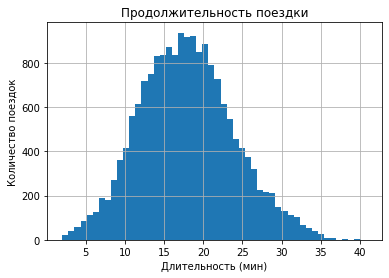

In [20]:
riders['duration'].hist(bins=50)
plt.title('Продолжительность поездки');
plt.ylabel('Количество поездок');
plt.xlabel('Длительность (мин)');

Общая картина длительности поездок не изменилась, однако пик около 0 убран, чтобы не мешал дальнейшим исследованиям. 

Таким образом, многие люди пользаются самокатами как альтернативой общественному транспорту - например, добраться из спальных районов до метро, от дома на работу и т.д. Поэтому, распределение, отражающее длительность поездки в 14-21 минуты, как наиболее популярные у пользователей, выглядит вполне правдоподобно. 

Таким образом, исследовательский анализ данных показал, что максимальное количество пользователей находятся в Пятигорске (около 220). Наибольшую популярность самокаты имеет у пользователей 22-28 лет, длительность часто совершаемых поездок приходится на 14-21 минуты, а расстояние - около 3 км. 
Также, обнаружено, что большинство пользователей предпочитают не платить за подписку, используя бесплатный тариф. 

#### Шаг 4. Объединение данных

Перед объединением всех таблиц в одну посчитаем количество строк в исходных таблицах:

In [21]:
print('Количество строк в таблице users:', users.shape[0])
print('Количество строк в таблице riders:', riders.shape[0])
print('Количество строк в таблице subs:', subs.shape[0])

Количество строк в таблице users: 1534
Количество строк в таблице riders: 17973
Количество строк в таблице subs: 2


In [22]:
general = users.merge(riders, on='user_id') #объединяем три таблицы в одну общую
general = general.merge(subs, on='subscription_type')
print(general.info()) #выводим иформацию об общей таблице, сверяем наличие всех столбцов

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17973 entries, 0 to 17972
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            17973 non-null  int64         
 1   name               17973 non-null  object        
 2   age                17973 non-null  int64         
 3   city               17973 non-null  object        
 4   subscription_type  17973 non-null  object        
 5   distance           17973 non-null  float64       
 6   duration           17973 non-null  float64       
 7   date               17973 non-null  datetime64[ns]
 8   month              17973 non-null  int64         
 9   year               17973 non-null  int64         
 10  minute_price       17973 non-null  int64         
 11  start_ride_price   17973 non-null  int64         
 12  subscription_fee   17973 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(7), object(3)
memory 

In [23]:
display(general)

,user_id,name,age,city,subscription_type,distance,duration,date,month,year,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,2021,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,2021,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,2021,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,2021,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,2021,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17968,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,2021,8,50,0
17969,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,2021,8,50,0
17970,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,2021,8,50,0
17971,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,2021,8,50,0


In [24]:
print('Количество дубликатов в таблице после объединения:', general.duplicated().sum())


Количество дубликатов в таблице после объединения: 0


In [25]:
users_free = general.query('subscription_type == "free"') #создаем отдельные таблицы для пользователей с подпиской и без
users_ultra = general.query('subscription_type == "ultra"')


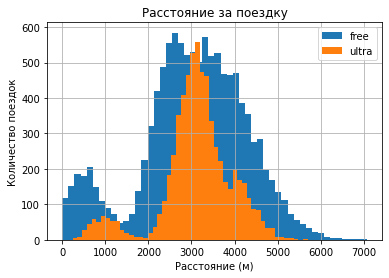

In [26]:
users_free['distance'].hist(bins=50, label='free') #выводим гистограммы расстояния поездок по подпискам
users_ultra['distance'].hist(bins=50, label='ultra')
plt.xlabel('Расстояние (м)')
plt.ylabel('Количество поездок')
plt.title('Расстояние за поездку')
plt.legend();

Визуализируя расстояние поездки в зависимости от типа подписки можем наблюдать, что пользователи, использующие бесплатный тариф предпочитают дальность поездки около 2,5 - 3,8 км, в то время, как большинство пользователей с подпиской свершают поездки на расстояние окло 3 км. 

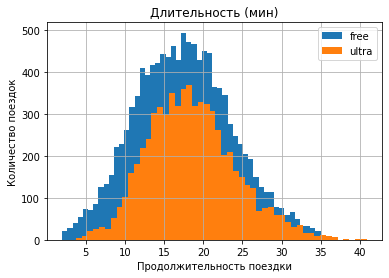

In [27]:
users_free['duration'].hist(bins=50, label='free') #выводим гистограммы длительности поездок по подпискам
users_ultra['duration'].hist(bins=50, label='ultra')
plt.xlabel('Продолжительность поездки')
plt.ylabel('Количество поездок')
plt.title('Длительность (мин)')
plt.legend();

Касаемо продолжительности поездки - тут особых различий нет. Пользователи как с подпиской, так и без, в большинстве своем выбирают поездки прододитьельностью коло 17 минут, распределение выглядит практически одинаково. Однако, мы можем наблюдать лишь различия в количестве пользователей - у тарифа "free" количество пользователей примерно в 1,5 больше, чем у людей, оформивший подписку. 

Таким образом, усредняя, можно сделать вывод о том, что пользователи, вне зависимости от типа подписки, проезжают в большинстве своем около 3 км, длительностью 17 минут. 

#### Шаг 5. Подсчёт выручки

Перед созданием агрегированного датафрейма округляем длительность поездок методом np.ceil(). Для того, чтобы не было ошибок при округлении, поскольку созданные таблицы users_ultra и users_free являются фильтрованными из первоначального датафрейма, методом copy() делаем эти таблицы независимыми, к которым будет применяться метод np.ceil()

In [28]:
users_ultra = users_ultra.copy()
users_free = users_free.copy()
users_free['duration'] = np.ceil(users_free['duration'])
users_ultra['duration'] = np.ceil(users_ultra['duration'])

Создаем датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными по подпискам: добавляем в таблицу суммарное расстояние, количество поездок и суммарное время, а также информацию о стоимости проезда для каждого пользователя за каждый месяц, используя для этого pivot_table(). Делаем это как для пользователей с подпиской, так и без неё.

In [29]:
free_info = users_free.pivot_table(
    index=['user_id', 'month'], 
    values=['distance','duration','minute_price', 'start_ride_price', 'subscription_fee'], 
    aggfunc={'distance':'sum', 'duration':'sum', 'user_id':'count','minute_price':'first','start_ride_price':'first', 'subscription_fee':'first' }
)
free_info.columns = ['distance_sum', 'duration_sum', 'minute_price', 'start_price', 'subscription', 'total_count']

display(free_info)

distance_sum  duration_sum  minute_price  start_price  \
user_id month                                                          
700     1       2515.690719          15.0             8           50   
        2      13446.659764          89.0             8           50   
        3       3798.334905          19.0             8           50   
        4       2984.551206          16.0             8           50   
        6       5927.650988          29.0             8           50   
...                     ...           ...           ...          ...   
1534    6       3409.468534          26.0             8           50   
        8       7622.453034          48.0             8           50   
        9       4928.173852          23.0             8           50   
        11     13350.015305          78.0             8           50   
        12      2371.711192          16.0             8           50   

               subscription  total_count  
user_id month                             
700     1                 0            1  
        2                 0            5  
        3                 0            1  
        4                 0            1  
        6                 0            2  
...                     ...          ...  
1534    6                 0            2  
        8                 0            2  
        9                 0            1  
        11                0            4  
        12                0            1  

[6767 rows x 6 columns]

In [30]:
ultra_info = users_ultra.pivot_table(
    index=['user_id', 'month'], 
    values=['distance','duration','minute_price', 'start_ride_price', 'subscription_fee'], 
    aggfunc={'distance':'sum', 'duration':'sum', 'user_id':'count','minute_price':'first','start_ride_price':'first', 'subscription_fee':'first' }
)
ultra_info.columns = ['distance_sum', 'duration_sum', 'minute_price', 'start_price', 'subscription', 'total_count']

display(ultra_info)

distance_sum  duration_sum  minute_price  start_price  \
user_id month                                                          
1       1       7027.511294          42.0             6            0   
        4        754.159807           7.0             6            0   
        8       6723.470560          46.0             6            0   
        10      5809.911100          32.0             6            0   
        11      7003.499363          56.0             6            0   
...                     ...           ...           ...          ...   
699     6       4072.797406          17.0             6            0   
        8       7018.324143          45.0             6            0   
        9       6364.861911          31.0             6            0   
        10      4707.845501          16.0             6            0   
        12      3202.890770          26.0             6            0   

               subscription  total_count  
user_id month                             
1       1               199            2  
        4               199            1  
        8               199            2  
        10              199            2  
        11              199            3  
...                     ...          ...  
699     6               199            1  
        8               199            2  
        9               199            2  
        10              199            1  
        12              199            1  

[4533 rows x 6 columns]

In [31]:
#рассчитывает прибыль по месяцам для пользователей с подпиской
ultra_info['profit'] = ultra_info['start_price'] * ultra_info['total_count'] + ultra_info['minute_price'] * ultra_info['duration_sum'] + ultra_info['subscription']
display(ultra_info)

distance_sum  duration_sum  minute_price  start_price  \
user_id month                                                          
1       1       7027.511294          42.0             6            0   
        4        754.159807           7.0             6            0   
        8       6723.470560          46.0             6            0   
        10      5809.911100          32.0             6            0   
        11      7003.499363          56.0             6            0   
...                     ...           ...           ...          ...   
699     6       4072.797406          17.0             6            0   
        8       7018.324143          45.0             6            0   
        9       6364.861911          31.0             6            0   
        10      4707.845501          16.0             6            0   
        12      3202.890770          26.0             6            0   

               subscription  total_count  profit  
user_id month                                     
1       1               199            2   451.0  
        4               199            1   241.0  
        8               199            2   475.0  
        10              199            2   391.0  
        11              199            3   535.0  
...                     ...          ...     ...  
699     6               199            1   301.0  
        8               199            2   469.0  
        9               199            2   385.0  
        10              199            1   295.0  
        12              199            1   355.0  

[4533 rows x 7 columns]

In [32]:
#рассчитывает прибыль по месяцам для пользователей без подписки
free_info['profit'] = free_info['start_price'] * free_info['total_count'] + free_info['minute_price'] * free_info['duration_sum'] + free_info['subscription']
display(free_info)

distance_sum  duration_sum  minute_price  start_price  \
user_id month                                                          
700     1       2515.690719          15.0             8           50   
        2      13446.659764          89.0             8           50   
        3       3798.334905          19.0             8           50   
        4       2984.551206          16.0             8           50   
        6       5927.650988          29.0             8           50   
...                     ...           ...           ...          ...   
1534    6       3409.468534          26.0             8           50   
        8       7622.453034          48.0             8           50   
        9       4928.173852          23.0             8           50   
        11     13350.015305          78.0             8           50   
        12      2371.711192          16.0             8           50   

               subscription  total_count  profit  
user_id month                                     
700     1                 0            1   170.0  
        2                 0            5   962.0  
        3                 0            1   202.0  
        4                 0            1   178.0  
        6                 0            2   332.0  
...                     ...          ...     ...  
1534    6                 0            2   308.0  
        8                 0            2   484.0  
        9                 0            1   234.0  
        11                0            4   824.0  
        12                0            1   178.0  

[6767 rows x 7 columns]

На данном этапе были созданы новые агрегированные датафреймы, отражающие суммарное расстояние и время, которое преодолел пользователь на самокате по месяцам. Такая таблица создана для пользователей как с подпиской, так и без нее. После создания таблиц была подсчитана выручка от пользователей по месяцам. 

#### Шаг 6. Проверка гипотез

Компанию инетерсует, тратят ли пользователи с подпиской больше времени на поездки? Нулевая гипотеза в таком случае будет гласить: "Пользователи тратят одинаковое количество времени независимо от подписки". Формулируем альтернативную гипотезу: "Пользователи с подпиской тратят больше времени на поездки". Поскольку выборки у нас независимые, для анализа будем использовать двухвыборочный t-тест для независимых выборок с проверкой правосторонней альтернативной гипотезы. 

In [33]:
print('Среднее значение продолжительности поездки пользователей с подпиской:', pd.Series(users_ultra['duration']).mean())
print('Среднее значение продолжительности поездки пользователей без подписки:', pd.Series(users_free['duration']).mean())
alpha = 0.05
results = st.ttest_ind(users_ultra['duration'],users_free['duration'], alternative='greater')
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Среднее значение продолжительности поездки пользователей с подпиской: 19.037692307692307
Среднее значение продолжительности поездки пользователей без подписки: 18.030855050989278
p-значение: 8.577910347796266e-28
Отвергаем нулевую гипотезу


Поскольку p-значение намного меньше заданного уровня значимосты, с польной уверенностью отвергаем нулевую гипотезу и подтверждаем, что пользователи с подпиской тратят больше времени на поездки, чем пользователи тарифа "free".

Следующая гипотеза, требующая проверки - среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров. Нулевая гипотеза будет гласить: "Пользователи с подпиской в среднем проезжают 3130 метров". Далее, формулируем альтернативную гипотезу: "Пользователи с подпиской в среднем проезжают больше 3130 метров". Поскольку выборка у нас одна будем использовать одновыборочный t-тест с проверкой правосторонней альтернативной гипотезы. 

In [34]:
value = 3130
alpha = 0.05
results = st.ttest_1samp(users_ultra['distance'], value, alternative='greater')
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


Поскольку p-значение выше установленного уровня значимости, нулевая гипотеза не была отвергнута. Таким образом, можем говорить о том, что пользователи с подпиской проезжают в среднем не более 3130 м. 

Далее, компанию интересует будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Как всегда формулируем нулевую гипотезу о равенстве вырочек, независимос от наличии подписки, а альтернативная гипотеза будет иметь правосторонний характер и гласить о том, что выручка от пользователей с подпиской больше, чем от пользователей типа "free".

In [35]:
print('Среднее значение выручки за месяц от пользователей с подпиской:', pd.Series(ultra_info['profit']).mean())
print('Среднее значение выручки за месяц оти пользователей без подписки:', pd.Series(free_info['profit']).mean())
alpha = 0.05
results = st.ttest_ind(ultra_info['profit'],free_info['profit'], alternative='greater')
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Среднее значение выручки за месяц от пользователей с подпиской: 362.7921906022502
Среднее значение выручки за месяц оти пользователей без подписки: 329.3326437121324
p-значение: 2.0314113674863288e-30
Отвергаем нулевую гипотезу


На этот раз нулевая гипотеза отвержена, что подтверждает большую вырочку от пользователей с подпиской. Это вполне ожидаемо, поскольку люди, которые часто пользуются какими-либо услугами зачастую приобретают подписки. То есть, можно предположить, что подписка сама по себе приносит доход компании в месяц, плюс такие пользователи чаще пользуются самокатами. Люди без подписку могут брать самокат пару раз в месяц, поскольку частое использоваие им не выгодно, т.к. старт одной поездки составляет примерно 25% от стоимости подписки. 


Техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Предполагается, что из-за этого количество обращений в техподдержку значимо снизилось. Имеется файл, содержащий для каждого пользователя данные о количестве обращений до обновления и после него. Для проверки гипотезы о том, что обновление серверов было результативным и количество обращений действительно снизилось, нужно взять файл с информацией о количестве обращений пользователей и применить к нему двухвыборочный t-тест для зависимых выборок, посколько выборки в данной случае имеют формат до-после -  st.ttest_rel(до, после, alternative='тип альтернативной гипотезы'). 

**Заключение.**

По исходным датафреймам проведен этап предобработки данных, где были выявлены дубликаты в таблице "users" и удалены, столбец с датой приведен в формат "datetime64", а также добавлен новый столбец в таблицу с номером месяца на основе столбца с датой.
    
На этапе исследовательском анализе данных построены графики для визуализации распределения пользователей по типу подписки, городам, возрасту, расстоянию за поездку и продолжительности поездки. Определено, что набольшее количество пользователей из Пятигорска, имеют возраст 22-28 лет и проезжают в основном около 3 км. Также, на этом этапе была обнаружена аномалия в виде очень короткой длительности в 0.5 минут для поездок на расстояния свыше 4 км. Закономерностей появления этой аномалии обнаружено но было. Это может быть связано с ошибкой выгрузки информации с серверов, либо же с софтом приложения. Поскольку выявленные аномалии малочисленные относительно всего массива данных, они были удалены во избежания дальнейших некорректных статистических рассчетов. 
    
Следующий этап, объединение данных, представлял собой создание новых отдельных датафреймов по пользователям, в зависимости от типа подписки. Также, была визуализирована информация о расстоянии и времени поездок для пользователей обеих категорий, которая показала, что пользователи проезжают примерно одинаковое расстояние в 3 км вне зависимости от типа подписки.
    
Далее, были созданы датафреймы для пользователей с подпиской и без, где были добавлены агрегированные данные по суммарному расстоянию, количеству поездок и суммарному времени для каждого пользователя за каждый месяц. Затем, в эти же таблицы был добавлен столбец с вырочкой, которую компания получила от каждого пользователя за каждый месяц. 
    
Затем, проводилась проверка гипотез. По результатам применения статистических тестов обнаружено, что пользователи с подпиской тратят больше времени на поездки, чем пользователи тарифа "free", а также проезжают в среднем не более 3130 м за одну поездку. Проверка выручек от пользователей с подпиской и без нее показала, что большую финансовую пользу приносят пользователи, купившие подписку. 